<a href="https://colab.research.google.com/github/VamsiMalla13/Vamsi_INFO5731_Spring2020-/blob/main/vamsi_exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 03/29/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

In [3]:
!pip install gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [4]:
!pip install pyLDAvis
import pyLDAvis
import gensim
import matplotlib.pyplot as plt
%matplotlib inline

     |████████████████████████████████| 1.7 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=454358c9eb498a8434131711371a1c1d004067bf5ad15763ba16ac9c198378ba
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [5]:
!pip install datasets
import datasets
from datasets import load_dataset


     |████████████████████████████████| 325 kB 4.0 MB/s 
     |████████████████████████████████| 67 kB 2.9 MB/s 
     |████████████████████████████████| 212 kB 10.2 MB/s 
     |████████████████████████████████| 136 kB 30.4 MB/s 
     |████████████████████████████████| 1.1 MB 31.0 MB/s 
     |████████████████████████████████| 127 kB 34.0 MB/s 
     |████████████████████████████████| 271 kB 41.1 MB/s 
     |████████████████████████████████| 144 kB 23.3 MB/s 
     |████████████████████████████████| 94 kB 2.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [6]:
dataset1=load_dataset('multi_news')


Using custom data configuration default


Generating train split:   0%|          | 0/44972 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5622 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5622 [00:00<?, ? examples/s]

Dataset multi_news downloaded and prepared to /root/.cache/huggingface/datasets/multi_news/default/1.0.0/2e145a8e21361ba4ee46fef70640ab946a3e8d425002f104d2cda99a9efca376. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [7]:
dataset1

DatasetDict({
    train: Dataset({
        features: ['document', 'summary'],
        num_rows: 44972
    })
    validation: Dataset({
        features: ['document', 'summary'],
        num_rows: 5622
    })
    test: Dataset({
        features: ['document', 'summary'],
        num_rows: 5622
    })
})

In [8]:
dataset2=dataset1.remove_columns('summary')
dataset2

DatasetDict({
    train: Dataset({
        features: ['document'],
        num_rows: 44972
    })
    validation: Dataset({
        features: ['document'],
        num_rows: 5622
    })
    test: Dataset({
        features: ['document'],
        num_rows: 5622
    })
})

In [9]:
data=dataset2['train']

In [10]:
df=data.to_pandas()
df=df[:10000]

In [11]:
from nltk.corpus import stopwords
from nltk import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer,LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk import ne_chunk
nltk.download('punkt')
nltk.download('wordnet')
stop_words=set(nltk.corpus.stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
def clean_text(headline):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(headline)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [12]:
df['processed data']=df['document'].apply(clean_text)

In [13]:
df.head()

,document,processed data
0,"National Archives \n \n Yes, it’s that time a...",National Archives time folk first Friday month...
1,LOS ANGELES (AP) — In her first interview sinc...,ANGELES first interview since banned estranged...
2,"GAITHERSBURG, Md. (AP) — A small, private jet ...",GAITHERSBURG small private crashed house Maryl...
3,Tucker Carlson Exposes His Own Sexism on Twitt...,Tucker Carlson Exposes Sexism Twitter Updated ...
4,A man accused of removing another man's testic...,accused removing another testicle meeting Port...


In [14]:
df.drop(['document'],axis=1,inplace=True)

In [15]:
df.head()

,processed data
0,National Archives time folk first Friday month...
1,ANGELES first interview since banned estranged...
2,GAITHERSBURG small private crashed house Maryl...
3,Tucker Carlson Exposes Sexism Twitter Updated ...
4,accused removing another testicle meeting Port...


In [16]:
vector=TfidfVectorizer(stop_words=stop_words,max_features=100)
vector_text=vector.fit_transform(df['processed data'])


In [17]:
print(vector_text)

  (0, 98)	0.076058481400842
  (0, 56)	0.12413207925696472
  (0, 60)	0.08650640768400684
  (0, 73)	0.2125823996938728
  (0, 61)	0.1638058665843409
  (0, 82)	0.1099520740424335
  (0, 70)	0.1116695783156291
  (0, 95)	0.22959776029061424
  (0, 34)	0.09284954486174506
  (0, 6)	0.10420828938232697
  (0, 72)	0.11255231050273998
  (0, 1)	0.10135642584767558
  (0, 0)	0.6232432411354182
  (0, 99)	0.14824840485408491
  (0, 80)	0.12123861056972958
  (0, 45)	0.5507971955900701
  (0, 20)	0.0908685043513028
  (0, 83)	0.16069218440543886
  (0, 47)	0.13052952676043036
  (1, 48)	0.07668961642513704
  (1, 64)	0.07990313963229201
  (1, 79)	0.06592079023149035
  (1, 21)	0.16877521849155386
  (1, 32)	0.06777634426569165
  (1, 81)	0.14680196245980606
  :	:
  (9999, 64)	0.20065851745069435
  (9999, 79)	0.08277251743737041
  (9999, 21)	0.21192024043599378
  (9999, 32)	0.08510241788474918
  (9999, 81)	0.0921649145502801
  (9999, 33)	0.08474456494234064
  (9999, 91)	0.24952289095777883
  (9999, 11)	0.08576509815

In [18]:
print(vector_text.shape)

(10000, 100)


In [19]:
idf=vector.idf_

In [20]:
d=dict(zip(vector.get_feature_names(), idf))
l=sorted(d, key=(d).get)
print(l[0],l[-1])


said trump


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
print(d['said'])
print(d['trump'])

1.0984848969217345
2.9864155586906858


In [22]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 


In [23]:
lda=lda_model.fit_transform(vector_text)

In [24]:
print(lda.shape) 
print(lda)

(10000, 10)
[[0.0229927  0.02299011 0.0229891  ... 0.02298973 0.02299056 0.02298938]
 [0.84445899 0.01728026 0.01727862 ... 0.01728065 0.01728    0.01727952]
 [0.01716519 0.01716555 0.01716628 ... 0.84551263 0.01716458 0.01716466]
 ...
 [0.0175497  0.01754849 0.0175492  ... 0.01755077 0.01755012 0.0175492 ]
 [0.02126009 0.02125805 0.02125903 ... 0.02126324 0.02125907 0.80866162]
 [0.85920653 0.01564261 0.01564502 ... 0.01564356 0.01564372 0.01564299]]


In [25]:
vocab = vector.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
said show year time news also last first would night 

Topic 1: 
north said united official photo american country year world national 

Topic 2: 
video show said like say report also would night people 

Topic 3: 
trump president said white house would state party people country 

Topic 4: 
like said year time say would people woman life make 

Topic 5: 
study said company year million percent people health also 000 

Topic 6: 
obama said president house would state government former white year 

Topic 7: 
said child family year death home old police told found 

Topic 8: 
said city government school state people year official would country 

Topic 9: 
police said officer court woman year case told state people 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [38]:
corpus=[]
a=[]
for i in range(len(df['processed data'])):
        a=df['processed data'][i]
        corpus.append(a)
corpus[:10]
texts = [[word for word in str(document).lower().split() if word not in stop_words] for document in corpus]
dictionary = corpora.Dictionary(texts)

In [39]:
from gensim import corpora, models, similarities
corpus = [dictionary.doc2bow(text) for text in texts]
tfidf = models.TfidfModel(corpus)

In [35]:
corpus_tfidf = tfidf[corpus]
total_topics=5

In [36]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = models.LdaModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
model_list, coherence_values = compute_coherence_values(dictionary,corpus_lda,texts,
                                                            10, 2, 1)

NameError: ignored

In [40]:
x=range(2, 10, 1)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
coherence_values

NameError: ignored

In [41]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=9)
corpus_lda = lda[corpus_tfidf] 
lda.show_topics(total_topics,5)


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

[(1,
  '0.008*"said" + 0.007*"company" + 0.005*"year" + 0.005*"would" + 0.004*"also"'),
 (7,
  '0.018*"said" + 0.011*"trump" + 0.008*"president" + 0.005*"would" + 0.005*"u.s."'),
 (5,
  '0.023*"said" + 0.009*"police" + 0.005*"people" + 0.005*"family" + 0.004*"told"'),
 (8,
  '0.017*"said" + 0.005*"would" + 0.005*"year" + 0.004*"state" + 0.004*"also"'),
 (0,
  '0.015*"said" + 0.007*"police" + 0.004*"people" + 0.004*"also" + 0.004*"found"')]

In [42]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
panel = gensimvis.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by defau

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      111.092506 -133.722946       1        1  34.990884
0       34.946613  107.064590       2        1  13.575309
8      -28.088213 -159.949036       3        1  10.265043
5      147.698074   21.369604       4        1   9.406354
2      -97.501183  126.981384       5        1   8.922798
6       30.312096  -32.794945       6        1   5.849471
4     -155.443665 -118.494690       7        1   5.702091
3     -204.248108   22.596130       8        1   5.650646
7      -79.404678   -6.864717       9        1   5.637404, topic_info=          Term        Freq       Total Category  logprob  loglift
283       said  112.000000  112.000000  Default  30.0000  30.0000
322      trump   11.000000   11.000000  Default  29.0000  29.0000
948     police   21.000000   21.000000  Default  28.0000  28.0000
264  president   12.000000   12.000000  Default  27.0000  27.0000
342      would   38.000000   38.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
123      |||||    1.468628   29.716369   Topic9  -5.9212  -0.1316
320       told    1.325946   19.309284   Topic9  -6.0234   0.1973
243       news    1.232675   14.059450   Topic9  -6.0964   0.4416
121       year    1.396410   40.986372   Topic9  -5.9717  -0.5036
404      could    1.223882   23.191099   Topic9  -6.1035  -0.0660

[919 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
8         1  0.318467  according
8         2  0.191080  according
8         3  0.191080  according
8         4  0.127387  according
8         5  0.063693  according
...     ...       ...        ...
123       5  0.067303      |||||
123       6  0.033651      |||||
123       7  0.067303      |||||
123       8  0.067303      |||||
123       9  0.033651      |||||

[987 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 9, 6, 3, 7, 5, 4, 8])

## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [43]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = models.LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
model_list, coherence_values = compute_coherence_values(dictionary, corpus_lda,texts,
                                                            10, 2, 1)

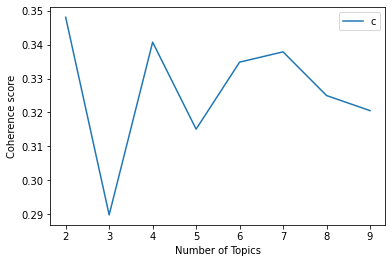

[0.34809704938497943,
 0.2897627918107156,
 0.3407435653383666,
 0.3150748298128392,
 0.3348451564858527,
 0.33787981748791784,
 0.32498670059573276,
 0.3205420570685621]

In [45]:
x=range(2, 10, 1)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
coherence_values

In [46]:
lsa = models.LsiModel(corpus, id2word=dictionary, num_topics=9)
corpus_lsa = lsa[corpus_tfidf] 
lsa.show_topics(total_topics,10)

[(0,
  '0.299*"mayor" + 0.277*"governor" + 0.267*"said" + 0.233*"zimmer" + 0.205*"2013" + 0.170*"email" + 0.149*"wildstein" + 0.147*"would" + 0.124*"hoboken" + 0.124*"office"'),
 (1,
  '0.441*"said" + -0.261*"mayor" + -0.226*"governor" + -0.212*"zimmer" + -0.156*"2013" + 0.150*"people" + 0.136*"trump" + -0.136*"wildstein" + -0.131*"email" + 0.127*"year"'),
 (2,
  '-0.519*"tobacco" + -0.459*"child" + -0.216*"human" + -0.198*"work" + -0.184*"rights" + -0.168*"watch" + -0.166*"labor" + -0.164*"working" + 0.162*"trump" + -0.151*"worker"'),
 (3,
  '-0.499*"trump" + 0.438*"said" + 0.259*"police" + -0.192*"president" + -0.135*"clinton" + -0.135*"would" + 0.104*"officer" + -0.099*"think" + -0.097*"campaign" + -0.093*"going"'),
 (4,
  '-0.375*"trump" + -0.312*"said" + -0.181*"tobacco" + 0.172*"study" + 0.152*"brain" + 0.146*"year" + 0.132*"time" + -0.130*"child" + -0.125*"president" + 0.122*"injury"')]

## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [47]:
# Write your code here

!pip install git+https://github.com/bmabey/pyLDAvis.git@master#egg=pyLDAvis



  Cloning https://github.com/bmabey/pyLDAvis.git (to revision master) to /tmp/pip-install-0smanxcm/pyldavis_71640956104f48c7bdfe14992030db2b
  Running command git clone -q https://github.com/bmabey/pyLDAvis.git /tmp/pip-install-0smanxcm/pyldavis_71640956104f48c7bdfe14992030db2b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done


In [48]:
!pip install lda2vec
import lda2vec

  Created wheel for lda2vec: filename=lda2vec-0.16.10-py3-none-any.whl size=14433 sha256=1a96f27ccbe11c19d5d3807f06231613a281877477de2a0722c56da5639974ff
  Stored in directory: /root/.cache/pip/wheels/76/51/1c/1e2960ded8d6e14b14454493fcc9c2d879a7fb99421867f177
Successfully built lda2vec


## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [49]:
# Write your code here
!pip install bertopic[visualization]
from bertopic import BERTopic



     |████████████████████████████████| 57 kB 2.6 MB/s 
     |████████████████████████████████| 79 kB 6.8 MB/s 
     |████████████████████████████████| 5.2 MB 11.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 5.5 MB/s 
     |████████████████████████████████| 3.8 MB 31.7 MB/s 
     |████████████████████████████████| 1.2 MB 38.1 MB/s 
     |████████████████████████████████| 636 kB 38.1 MB/s 
     |████████████████████████████████| 895 kB 37.1 MB/s 
     |████████████████████████████████| 6.5 MB 48.4 MB/s 
     |████████████████████████████████| 1.1 MB 38.5 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330764 sha256=1e158f6b91cb7624603d46b09688bbd3f8a3d614df8b9a0c325c9c2b19ed6c42
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
  Created wheel for sentenc

In [50]:
model = BERTopic(verbose=True,nr_topics=10)

docs =df['processed data']
 
topics, probabilities = model.fit_transform(docs)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

2022-04-04 03:51:19,868 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2022-04-04 03:52:10,677 - BERTopic - Reduced dimensionality with UMAP
2022-04-04 03:52:11,260 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2022-04-04 03:52:48,125 - BERTopic - Reduced number of topics from 168 to 11


In [51]:
model.visualize_topics()

In [52]:
model.visualize_barchart(n_words=10,top_n_topics=10)

## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

In [53]:
coherencemodel = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
coh_lda=coherencemodel.get_coherence()


In [54]:
coherencemodel2=CoherenceModel(model=lsa, texts=texts, dictionary=dictionary, coherence='c_v')
coh_lsa=coherencemodel.get_coherence()

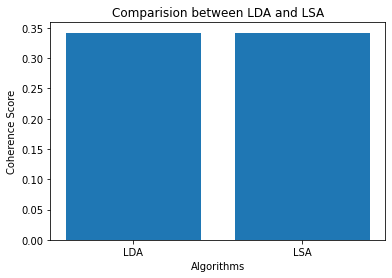

In [55]:
coherence=['LDA','LSA']
value=[coh_lda,coh_lsa]
plt.bar(coherence,value)
plt.xlabel('Algorithms')
plt.ylabel('Coherence Score')
plt.title('Comparision between LDA and LSA')
plt.show()